# 0 Visão Geral

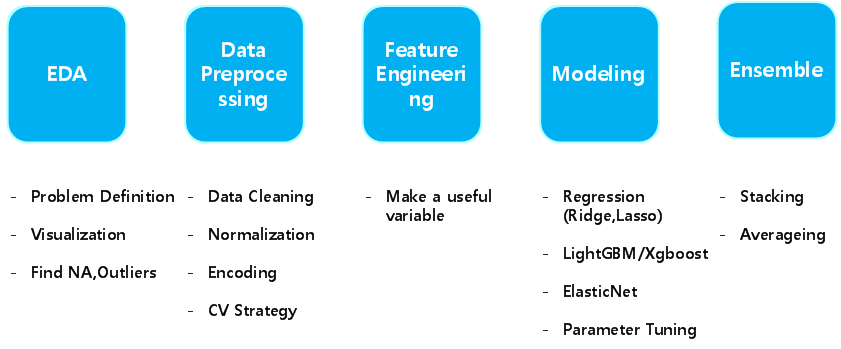

# 1 Entendimento dos Dados

## Definição do Problema
 
O propósito é predizer o preço de casas. O problema é chamado de "SalePrice". Para fazer isso, é usado uma métrica de avaliação chamada RMSLE (Root Mean Squared Logarithmic Error).

O que é o RMLE?

$$
    RMLE = \sqrt{\frac{1}{N} \sum_{i=1}^N \left( \log{(y_i + 1) - \log{(\hat{y} + 1 )}} \right)^2 }
$$

The purpose of this competition is to accurately predict the price of a house called SalePrice. To do this, we use the evaluation metric called RMSLE. 

RMSLE é uma forma de comparar diferenças entre as variáveis preditas e as variáveis esperadas. A razão de colocar o LOG é de diminuir a dimensão de resultados.

## Descrição da Competição

Pergunte a um comprador para descrever sua casa do sonho e eles provavelmente não vão falar sobre a altura do teto da cozinha ou a aproximidade da casa da rodovia. Mas o conjunto de dados prova que há muita influência de diversos fatores na negociação do preço de uma casa, além do número de quartos ou se tem uma cerquinha branca.

Com aproximadamente 79 variáveis com diferentes aspectores de casas residencias em Ames, Iowa. Essa base é para a predição do preço final de cada casa.

Agora, nós temos que fazer exploração dos dados.

In [1]:
# Loading packages
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [2]:
df_train = pd.read_csv('house_data/train.csv')
df_test  = pd.read_csv('house_data/test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("Dados de treino", df_train.shape)
print("Dados de teste ", df_test.shape)

Dados de treino (1460, 81)
Dados de teste  (1459, 80)


Note que os dados de treino e teste são bem similares, 1460 e 1459. E existem várias variáveis. Então nós temos que escolher a estratégia adequada para a seleção de características e validação cruzada.

## Vamos ver a descrição das variáveis!!

In [5]:
# Descrição sumária dos preços 
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

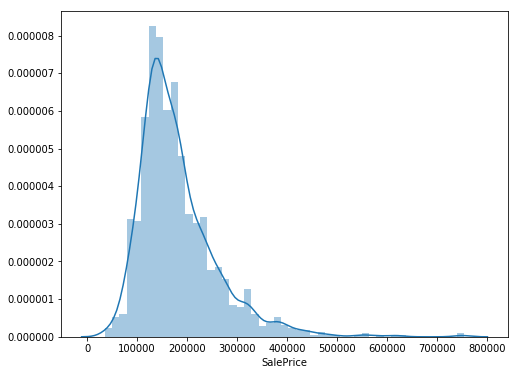

In [6]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['SalePrice'])

In [7]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Valor de Skewness e Kurtosis (kurtosis < 3) próximo de zero são melhores. 

* Skewness é uma medida de simetria, ou mais precisamente, a falta de simetria. Uma distribuição, ou um conjunto de dados, é simétrico se ele tem a mesma "forma" tanto da esquerda quanto da direita.

* Kurtosis é uma medida para verificar se os dados possuem altos valores na calda da distribuição normal. Isso é, o conjunto de dados tende a ter outliers. Conjuntos de dados com baixo valor de kurtosis tendem a ter valores baixos na calda, ou não possuem outliers.

## Normalizando os dados

### Calculando log(1 + x) nos dados

In [8]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

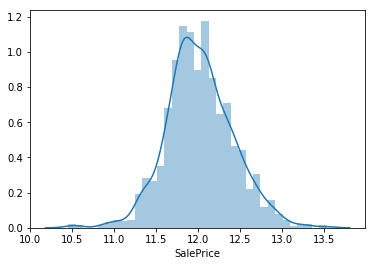

In [9]:
sns.distplot(df_train['SalePrice'])

In [10]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 0.121347
Kurtosis: 0.809519


## Correlações

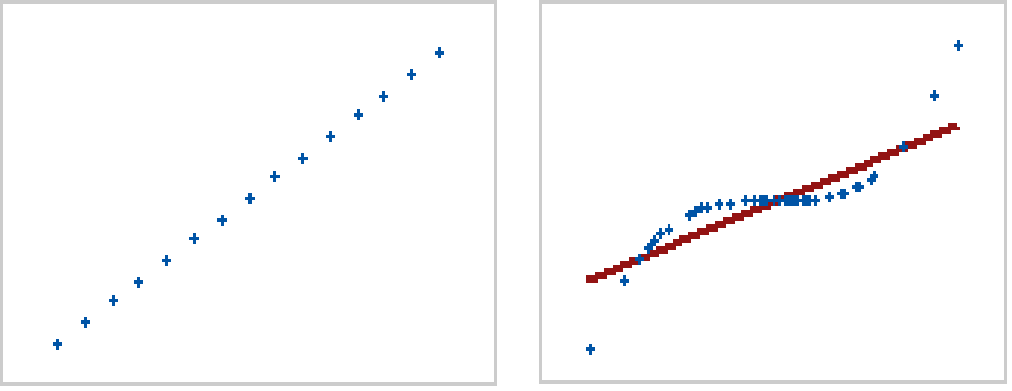

### Pearson = +1, Spearman = +1                     ------------------------------------------------            Pearson = +0.851, Spearman = +1

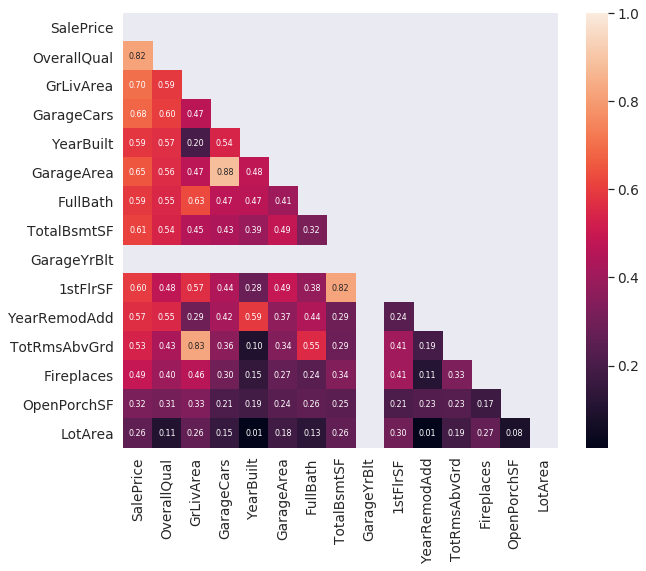

In [11]:
#saleprice matriz de correlação
k = 15 # número de variáveis
corrmat = abs(df_train.corr(method='spearman')) # correlação de spearman
cols = corrmat.nlargest(k, 'SalePrice').index # o k-ésimo maior valor
cm = np.corrcoef(df_train[cols].values.T) # calcula a correlação
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10, 8))

mask = np.zeros_like(cm) 
mask[np.triu_indices_from(mask)] = True 
sns.set_style("white")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 8}, 
                 yticklabels=cols.values, xticklabels=cols.values, mask = mask)
plt.show()

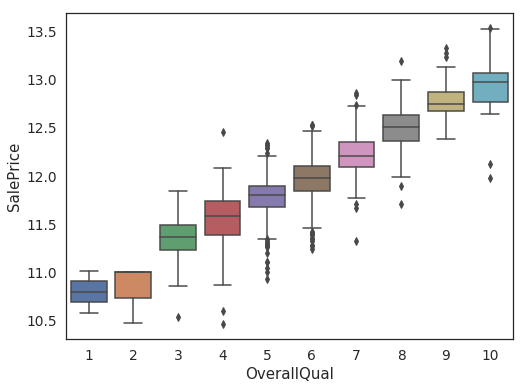

In [12]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

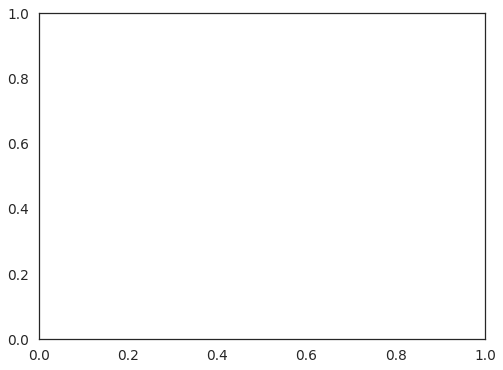

In [14]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))

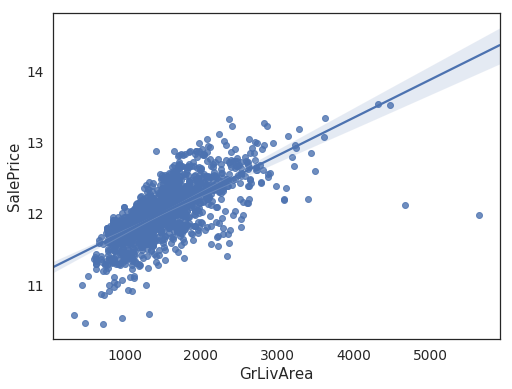

In [15]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='GrLivArea', y="SalePrice", data=data)

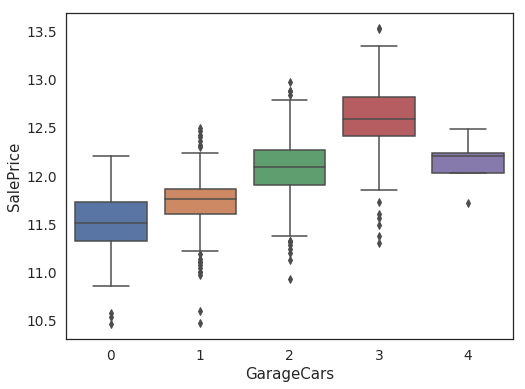

In [16]:
data = pd.concat([df_train['SalePrice'], df_train['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data)

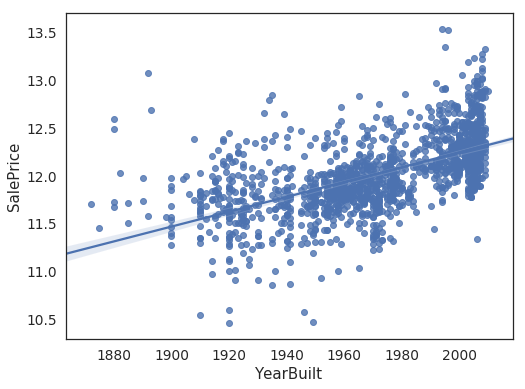

In [17]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='YearBuilt', y="SalePrice", data=data)

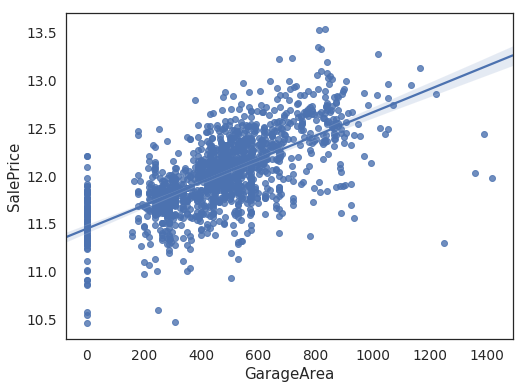

In [18]:
data = pd.concat([df_train['SalePrice'], df_train['GarageArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='GarageArea', y="SalePrice", data=data)

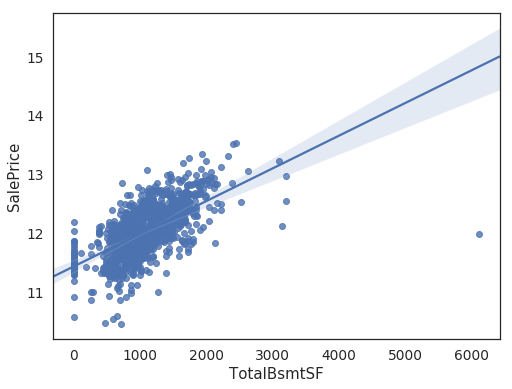

In [19]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='TotalBsmtSF', y="SalePrice", data=data)

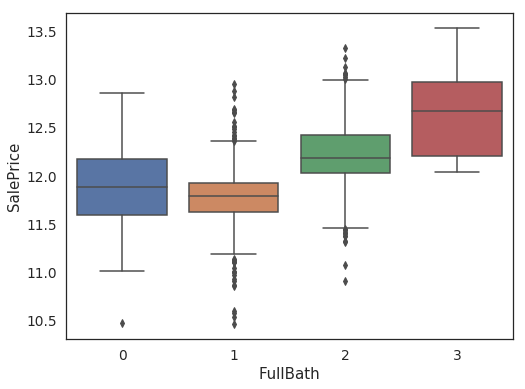

In [20]:
data = pd.concat([df_train['SalePrice'], df_train['FullBath']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='FullBath', y="SalePrice", data=data)

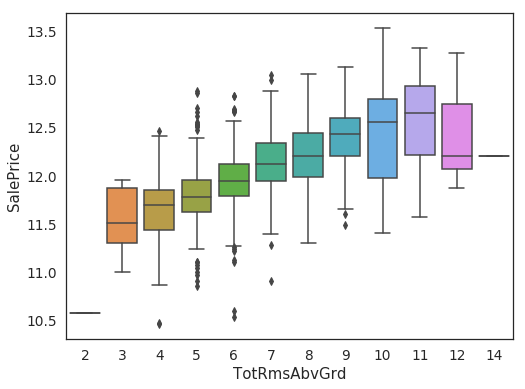

In [21]:
data = pd.concat([df_train['SalePrice'], df_train['TotRmsAbvGrd']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=data)

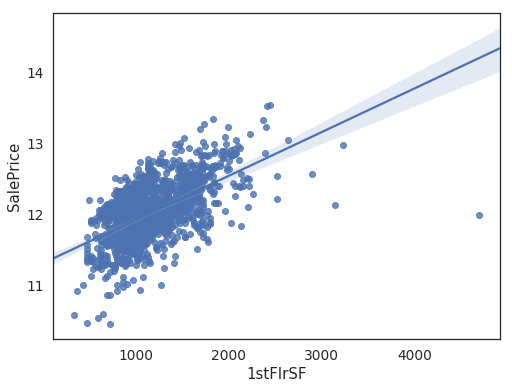

In [22]:
data = pd.concat([df_train['SalePrice'], df_train['1stFlrSF']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='1stFlrSF', y="SalePrice", data=data)

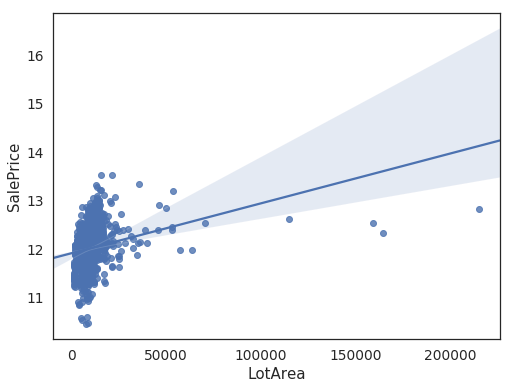

In [23]:
data = pd.concat([df_train['SalePrice'], df_train['LotArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='LotArea', y="SalePrice", data=data)

# Trabalhando com as variáveis categóricas

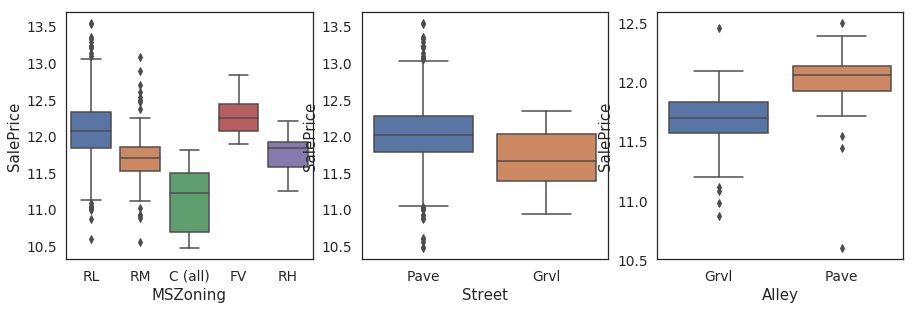

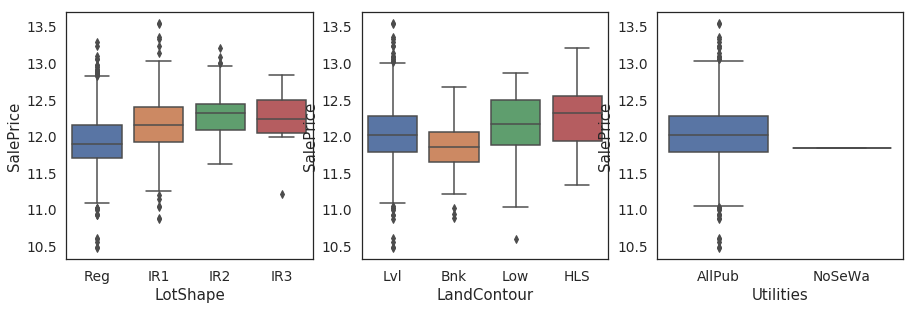

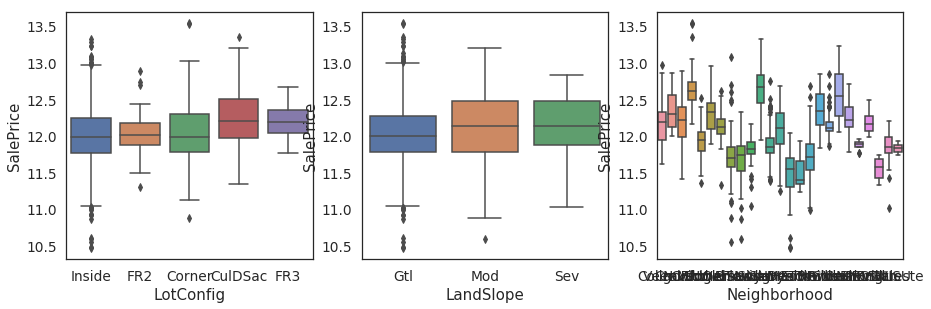

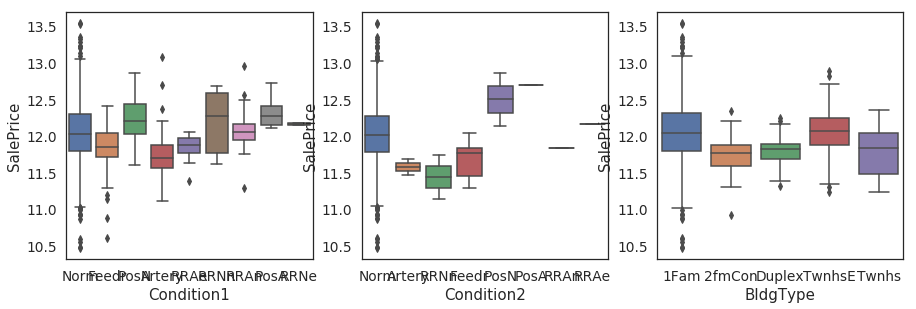

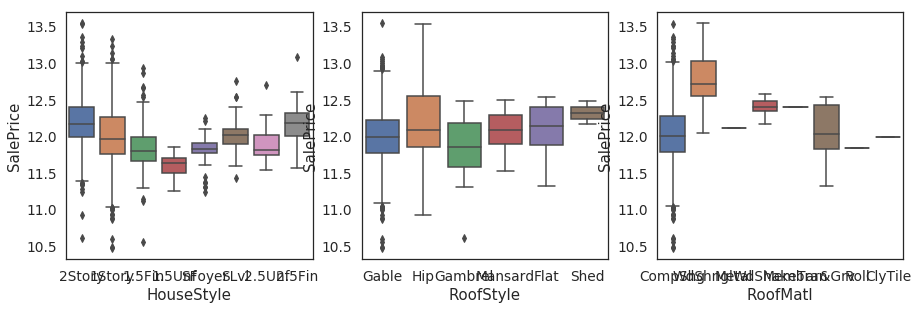

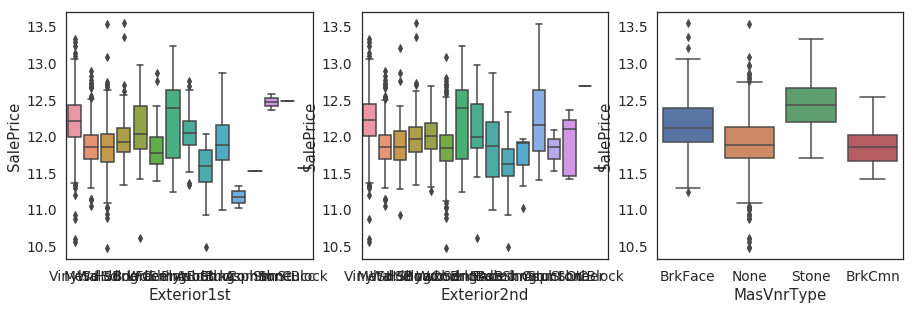

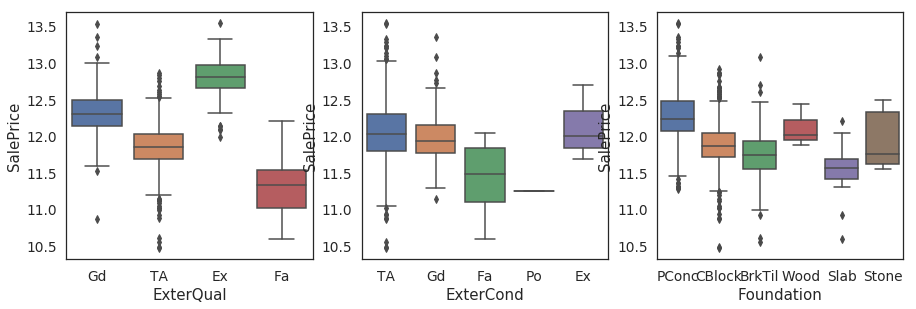

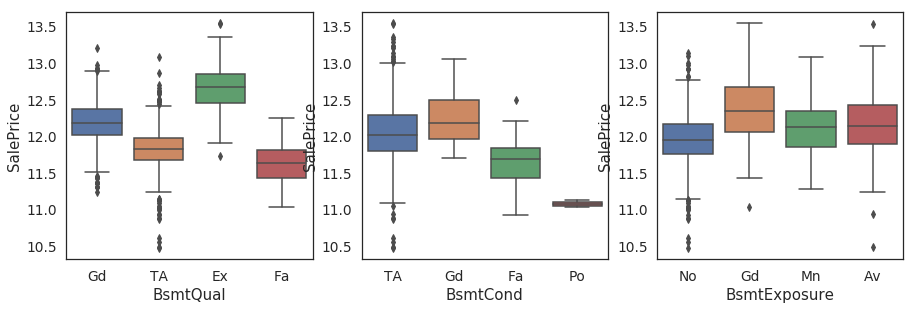

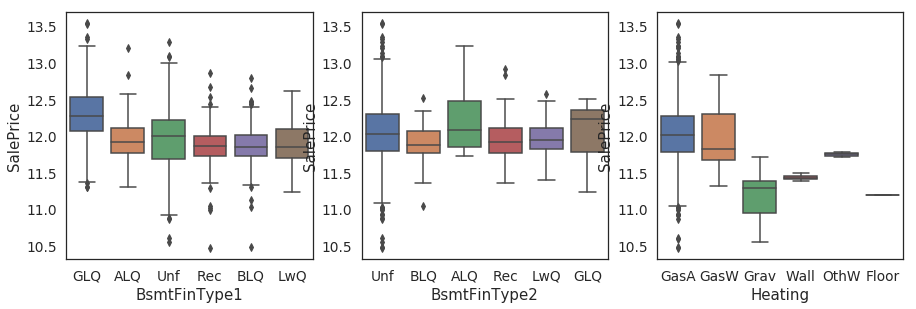

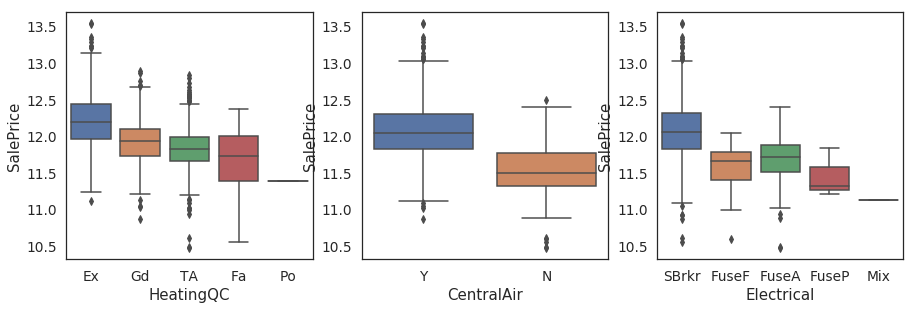

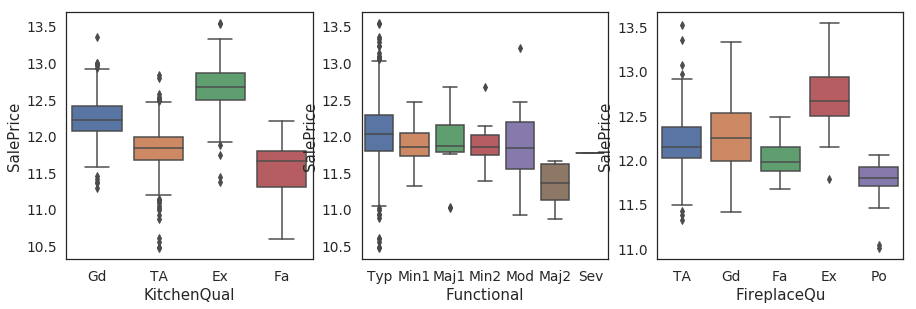

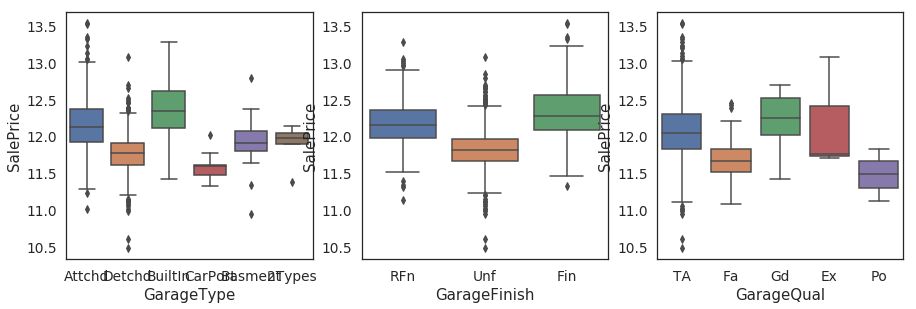

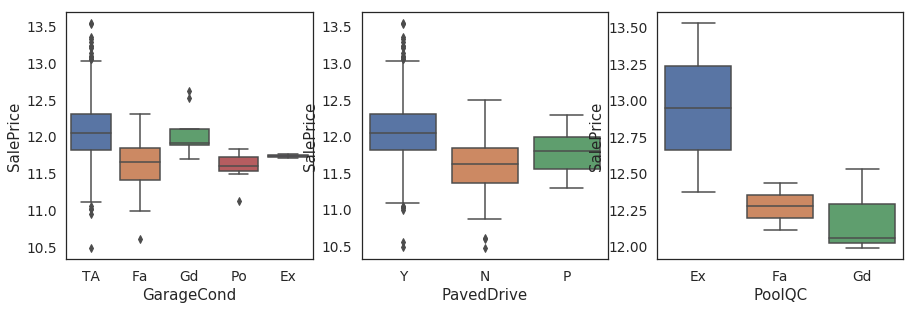

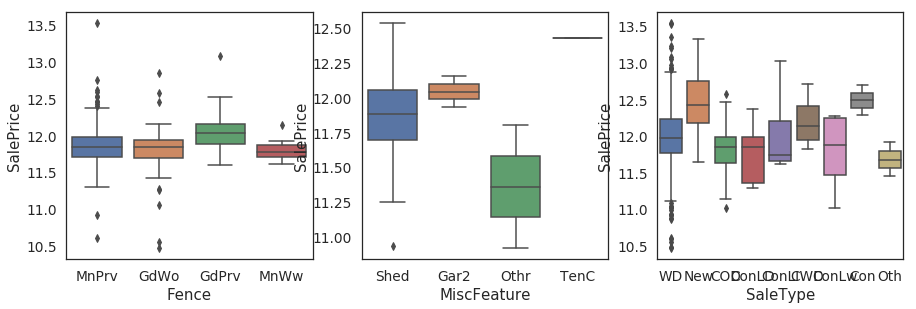

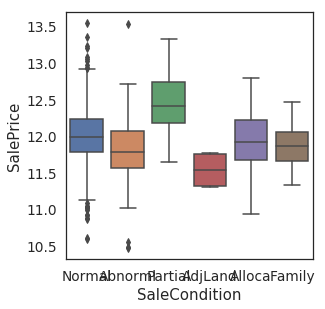

In [24]:
categorical_features = df_train.select_dtypes(include = ["object"]).columns

ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df_train[categorical_features]):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=df_train, x=c, y='SalePrice', ax=ax2)
            #sns.violinplot(data=ds_cat, x=c, y='SalePrice', ax=ax2)
            #sns.swarmplot(data = ds_cat, x=c, y ='SalePrice', color = 'k', alpha = 0.4, ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

Text(0.5,1,'Total de valores faltantes (%)')

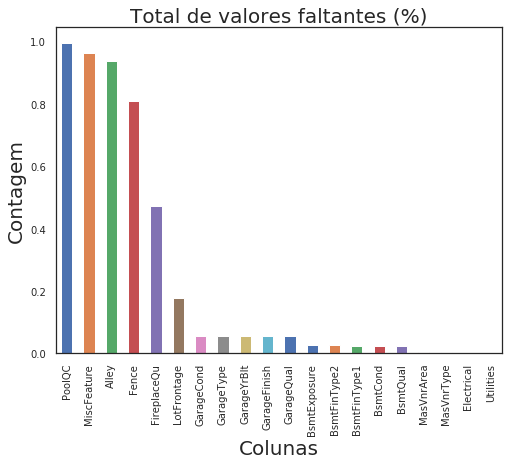

In [25]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#histograma
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Colunas", fontsize = 20)
plt.ylabel("Contagem", fontsize = 20)
plt.title("Total de valores faltantes (%)", fontsize = 20)

Text(0.5,1,'Total Missing Value (%)')

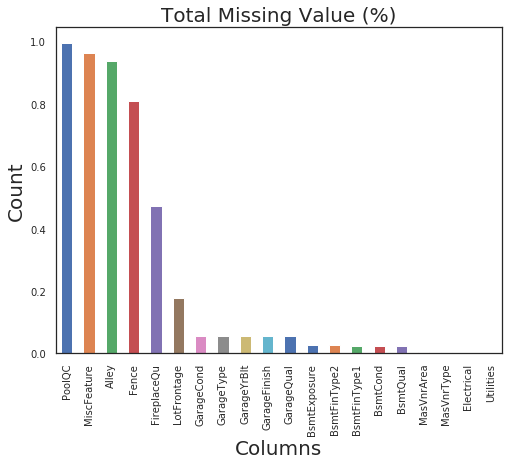

In [26]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#histogram
#missing_data = missing_data.head(20)
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

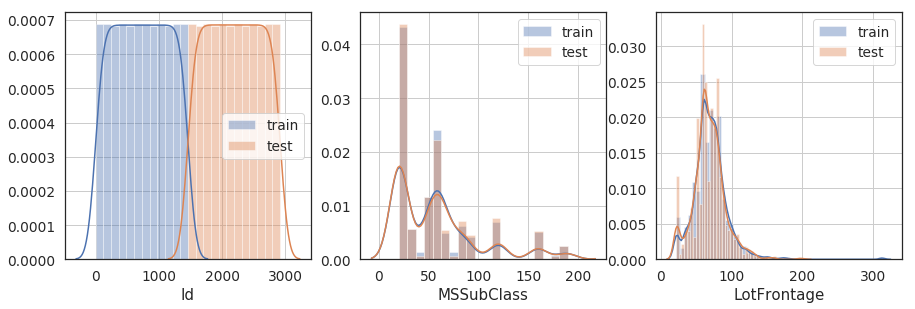

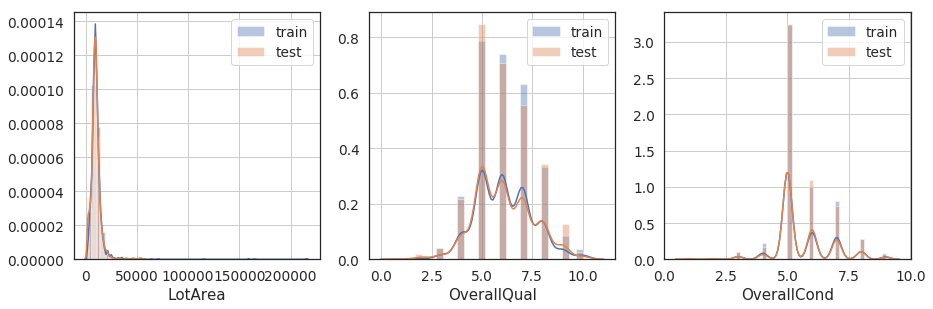

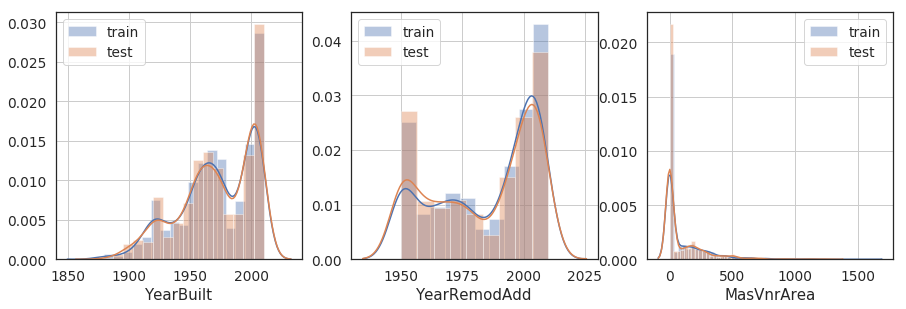

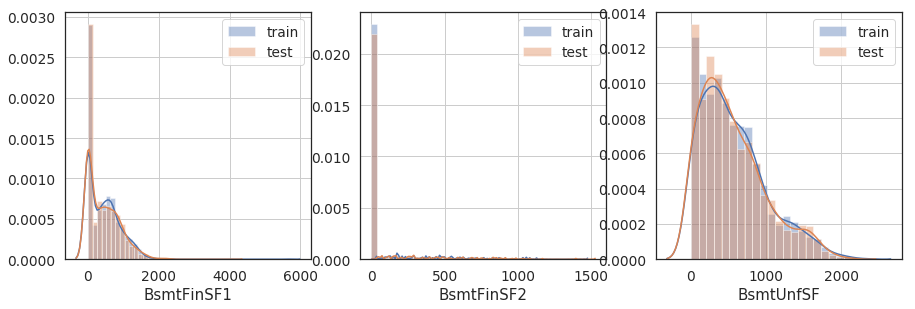

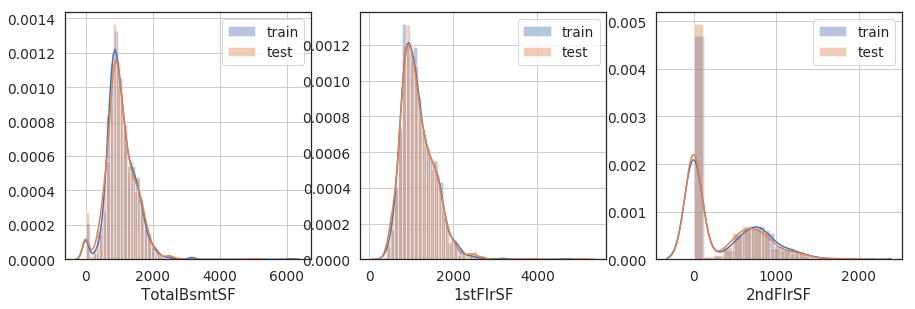

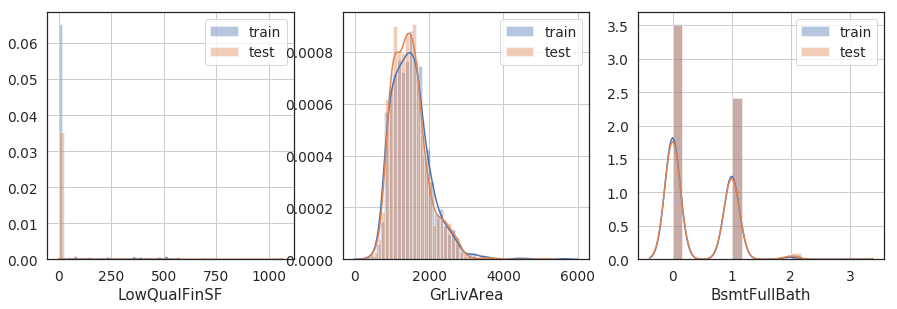

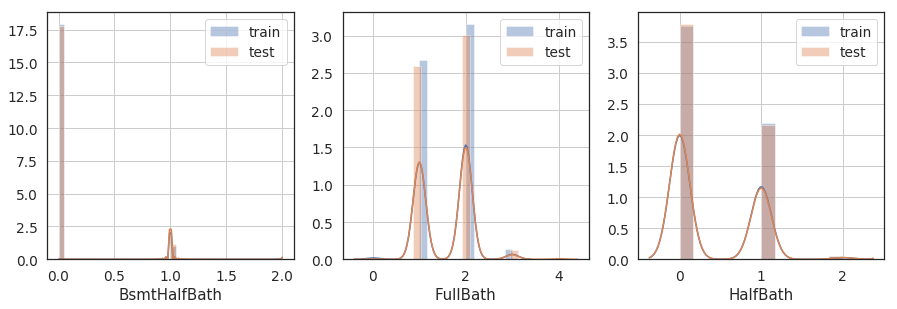

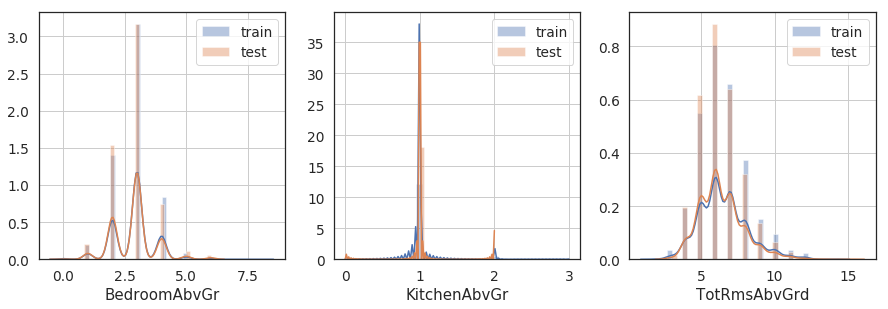

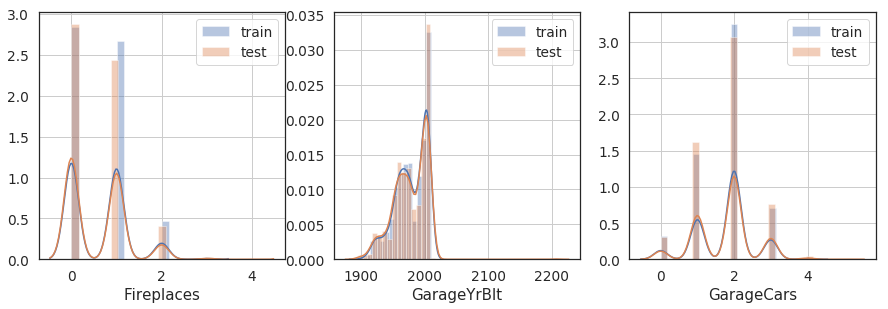

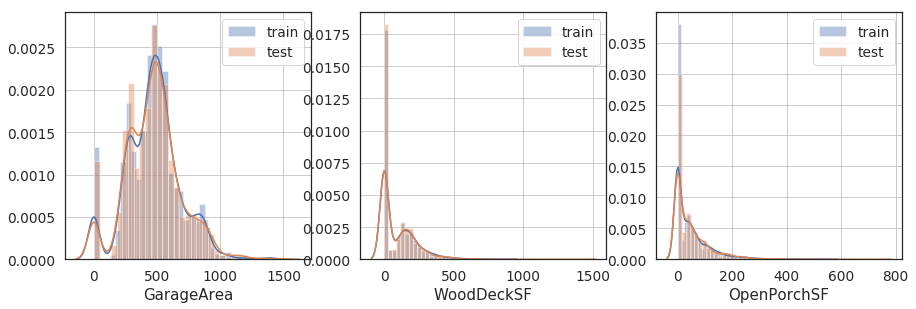

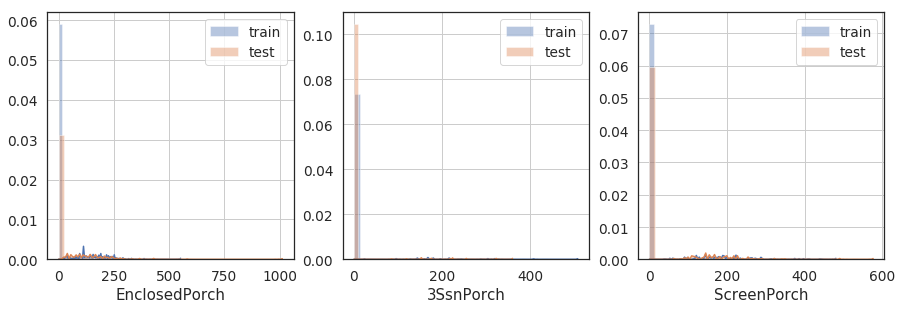

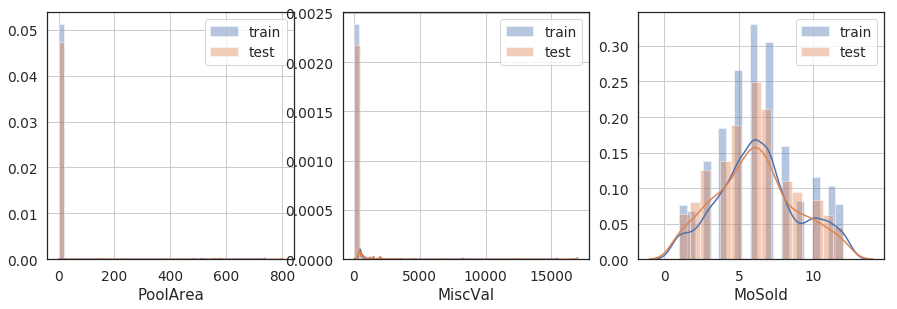

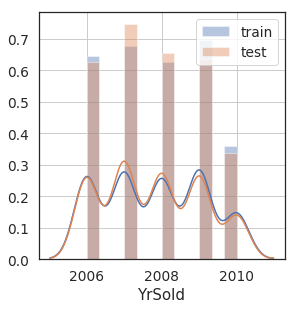

In [27]:
Numeric = df_train.copy()
del Numeric['SalePrice']
Numeric_columns = Numeric.select_dtypes(include = ["int64","float64"]).columns

ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(Numeric_columns):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(df_train[c].dropna())
            sns.distplot(df_test[c].dropna())
            plt.legend(['train', 'test'])
            plt.grid()            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1
del Numeric

# Pre-processamento

## Limpeza dos dados, removendo outliers

De fato, é difícil jugar se é um outlier ou não apenas com informações visuais. E quanto menor o número de dados, maior é o efeito da remoção dos outliers. A forma mais fácil é remover os outliers e ver se o "SCORE" aumenta após a aplicação da validação cruzada.

In [28]:
# Deletando os outliers
df_train = df_train[df_train['Id'] != 692][df_train['Id'] != 1183]
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<12.5)].index)
df_train = df_train.drop(df_train[(df_train['LotArea']>150000)].index)
df_train = df_train.drop(df_train[(df_train['GarageArea']>1200) & (df_train['SalePrice']<12.5)].index)

## Removendo valores faltantes

Text(0.5,1,'Total Valores Faltantes (%)')

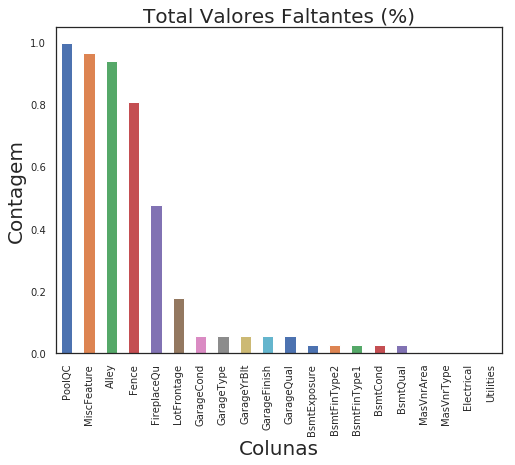

In [29]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Colunas", fontsize = 20)
plt.ylabel("Contagem", fontsize = 20)
plt.title("Total Valores Faltantes (%)", fontsize = 20)

In [30]:

len_train = df_train.shape[0]
y_reg = df_train['SalePrice']
Id = df_test['Id']
df_all = pd.concat([df_train,df_test])
del df_all['Id']


In [31]:
#in these features, NAN means none
df_all["PoolQC"] = df_all["PoolQC"].fillna("None")
df_all["MiscFeature"] = df_all["MiscFeature"].fillna("None")
df_all["Alley"] = df_all["Alley"].fillna("None")
df_all["Fence"] = df_all["Fence"].fillna("None")
df_all["FireplaceQu"] = df_all["FireplaceQu"].fillna("None")
df_all['BsmtQual'] = df_all['BsmtQual'].fillna('None')
df_all['BsmtCond'] = df_all['BsmtCond'].fillna('None')
df_all['BsmtExposure'] = df_all['BsmtExposure'].fillna('None')
df_all['BsmtFinType1'] = df_all['BsmtFinType1'].fillna('None')
df_all['BsmtFinType2'] = df_all['BsmtFinType2'].fillna('None')
df_all['GarageType'] = df_all['GarageType'].fillna('None')
df_all['GarageFinish'] = df_all['GarageFinish'].fillna('None')
df_all['GarageQual'] = df_all['GarageQual'].fillna('None')
df_all['GarageCond'] = df_all['GarageCond'].fillna('None')

#in these features, NAN means 0
df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].fillna(0)
df_all['BsmtFinSF2'] = df_all['BsmtFinSF2'].fillna(0)
df_all['BsmtUnfSF'] = df_all['BsmtUnfSF'].fillna(0)
df_all['TotalBsmtSF'] = df_all['TotalBsmtSF'].fillna(0)
df_all['BsmtFullBath'] = df_all['BsmtFullBath'].fillna(0)
df_all['BsmtHalfBath'] = df_all['BsmtHalfBath'].fillna(0)
df_all['MasVnrArea'] = df_all['MasVnrArea'].fillna(0)
df_all['GarageYrBlt'] = df_all['GarageYrBlt'].fillna(0)
df_all['GarageCars'] = df_all['GarageCars'].fillna(0)
df_all['GarageArea'] = df_all['GarageArea'].fillna(0)

# These features, we just fill them with common case
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])
df_all['MasVnrType'] = df_all['MasVnrType'].fillna(df_all['MasVnrType'].mode()[0])
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])
df_all['Functional'] = df_all['Functional'].fillna(df_all['Functional'].mode()[0])
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

# LotFrontage has more missing value, thus we consider it more delicately
df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

Text(0.5,1,'Total Missing Value (%)')

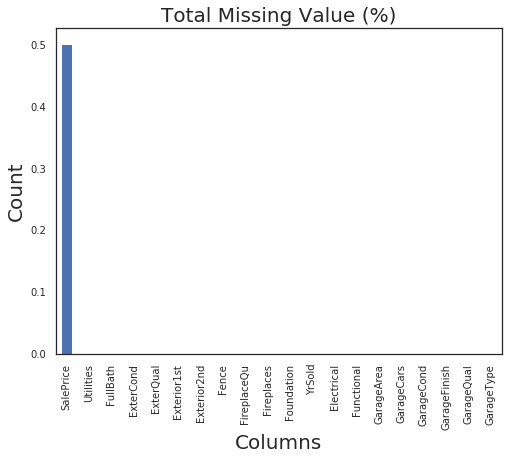

In [32]:
#missing data
total = df_all.isnull().sum().sort_values(ascending=False)
percent = (df_all.isnull().sum()/df_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#histogram
#missing_data = missing_data.head(20)
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

# One-Hot Encoding

In [33]:
df_all['MSSubClass'] = df_all['MSSubClass'].apply(str)
df_all['OverallCond'] = df_all['OverallCond'].astype(str)

In [34]:
categorical_features = df_all.select_dtypes(include = ["object"]).columns
numerical_features = df_all.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

Numerical features : 34
Categorical features : 45


In [35]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoding = df_all.copy()
one_hot_encoding = pd.get_dummies(one_hot_encoding)
#len_train
one_hot_encoding.iloc[:,36:50].head()

,Alley_None,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd
0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,0,0,1,0,1
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,1,1,0


In [36]:
df_all.iloc[:,20:30].head()

,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath
0,0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2
1,0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2
2,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2
3,272,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1
4,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2


In [37]:
label_encoding = df_all.copy()
for i in categorical_features:
    label_encoding[i], indexer = pd.factorize(label_encoding[i])
label_encoding.iloc[:,20:30].head()

,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath
0,0,0,0,0,0,0,0,0,0,2
1,0,0,1,1,1,0,1,1,1,2
2,0,0,0,0,0,0,1,1,0,2
3,272,0,1,2,2,0,2,1,2,1
4,0,0,0,0,0,0,1,1,0,2


In [38]:
indexer

Index(['AllPub', 'NoSeWa'], dtype='object')

In [39]:
frequency_encoding_all = df_all.copy()
    
def frequency_encoding(frame, col):
    freq_encoding = frame.groupby([col]).size()/frame.shape[0] 
    freq_encoding = freq_encoding.reset_index().rename(columns={0:'{}_Frequency'.format(col)})
    return frame.merge(freq_encoding, on=col, how='left')

for col in categorical_features:
    frequency_encoding_all = frequency_encoding(frequency_encoding_all, col)
frequency_encoding_all = frequency_encoding_all.drop(categorical_features,axis=1, inplace=False)
frequency_encoding_all.iloc[:,20:30].head()

,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd
0,0,196.0,0,2,61,7,0,12.247699,0,8
1,0,0.0,0,5,0,6,0,12.109016,0,6
2,0,162.0,0,9,42,7,0,12.317171,0,6
3,0,0.0,0,2,35,7,0,11.849405,0,7
4,0,350.0,0,12,84,8,0,12.429220,0,9


In [40]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#K-folds Validation function
n_folds = 5 # if LOOCV k = df_train.shape[0]

def rmsle_cv(model,df):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
    rmse= np.sqrt(-cross_val_score(model, df.values, y_reg, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [41]:
one_hot_encoding = df_all.copy()
del one_hot_encoding['SalePrice']
one_hot_encoding = pd.get_dummies(one_hot_encoding)
one_hot_encoding_train = one_hot_encoding[:len_train]
one_hot_encoding_test = one_hot_encoding[len_train:]
#del one_hot_encoding

import lightgbm as lgb
from sklearn.linear_model import LinearRegression

model = lgb.LGBMRegressor(objective='regression',num_leaves=5,  
                              learning_rate=0.05, n_estimators=720,  
                              max_bin = 55, bagging_fraction = 0.8,  
                              bagging_freq = 5, feature_fraction = 0.2319,  
                              feature_fraction_seed=9, bagging_seed=9,  
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)  

score = rmsle_cv(model,one_hot_encoding_train)  
print("One-hot encoding(5-folds) LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


ModuleNotFoundError: No module named 'lightgbm'

# Modeling

Text(0,0.5,'score')

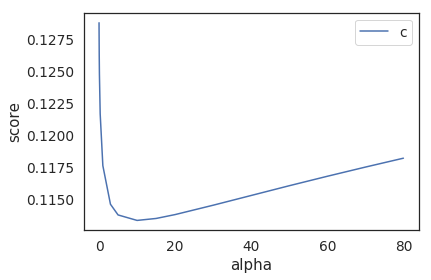

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import RidgeCV

one_hot_encoding_train = one_hot_encoding[:len_train]
one_hot_encoding_test = one_hot_encoding[len_train:]
del one_hot_encoding

kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, one_hot_encoding_train, y_reg, 
                                   scoring="neg_mean_squared_error", 
                                   cv = kfolds))
    return(rmse)

def ridge_selector(k):
    ridge_model = make_pipeline(RobustScaler(),
                                RidgeCV(alphas = [k],
                                        cv=kfolds)).fit(one_hot_encoding_train, y_reg)
    
    ridge_rmse = cv_rmse(ridge_model).mean()
    return(ridge_rmse)

r_alphas = [.0001, .0003, .0005, .0007, .0009, 
          .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

ridge_scores = []
for alpha in r_alphas:
    score = ridge_selector(alpha)
    ridge_scores.append(score)
    
plt.plot(r_alphas, ridge_scores, label='Ridge')
plt.legend('center')
plt.xlabel('alpha')
plt.ylabel('score')

In [43]:
alphas_alt = [9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1,10.2]

ridge_model2 = make_pipeline(RobustScaler(),
                            RidgeCV(alphas = alphas_alt,
                                    cv=kfolds)).fit(one_hot_encoding_train, y_reg)

print("Ridge rmse : ",cv_rmse(ridge_model2).mean())

Ridge rmse :  0.11342526799254357


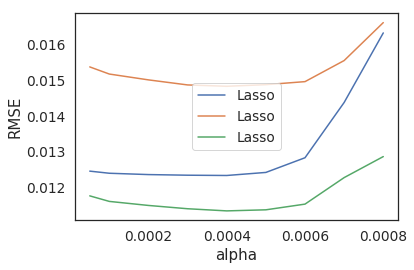

In [44]:
from sklearn.linear_model import LassoCV

alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]


lasso_model2 = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=1e7,
                                    alphas = alphas2,
                                    random_state = 42)).fit(one_hot_encoding_train, y_reg)
scores = lasso_model2.steps[1][1].mse_path_

plt.plot(alphas2, scores, label='Lasso')
plt.legend(loc='center')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()


In [45]:
print("Best of alpha in lasso model :",lasso_model2.steps[1][1].alpha_)
print("lasso rmse : ",cv_rmse(lasso_model2).mean())

Best of alpha in lasso model : 0.0004
lasso rmse :  0.11240470548637435


In [46]:
from sklearn.linear_model import ElasticNetCV

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_cv = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio))

elastic_model3 = elastic_cv.fit(one_hot_encoding_train, y_reg)
print("elastic model rmse : ",cv_rmse(elastic_model3).mean())


elastic model rmse :  0.11245861153401329


In [51]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb3 = XGBRegressor(learning_rate =0.01, n_estimators=5200, max_depth=3,
                     min_child_weight=0 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.7,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006)

xgb_fit = xgb3.fit(one_hot_encoding_train, y_reg)
print("Xgboost model rmse : ",cv_rmse(xgb_fit).mean())

Xgboost model rmse :  0.11457984391155403


In [57]:
import lightgbm as lgb
model = lgb.LGBMRegressor(objective='regression',num_leaves=5,  
                              learning_rate=0.01, n_estimators=5000,  
                              max_bin = 55, bagging_fraction = 0.8,  
                              bagging_freq = 5, feature_fraction = 0.2319,  
                              feature_fraction_seed=9, bagging_seed=9,  
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)  

lgbm_fit = model.fit(one_hot_encoding_train, y_reg)
print("lightgbm model rmse : ",cv_rmse(model).mean())

lightgbm model rmse :  0.11570912289273683


# Essemble

In [58]:
train_ridge_preds = ridge_model2.predict(one_hot_encoding_train)
train_lasso_preds = lasso_model2.predict(one_hot_encoding_train)
train_elastic_preds = elastic_model3.predict(one_hot_encoding_train)
train_xgb_preds = xgb_fit.predict(one_hot_encoding_train)
train_lgbm_preds = lgbm_fit.predict(one_hot_encoding_train)

stackX = pd.DataFrame(np.transpose(np.array([train_ridge_preds,train_lasso_preds,train_elastic_preds,train_xgb_preds,train_lgbm_preds])))

model = lgb.LGBMRegressor(objective='regression',num_leaves=5,  
                              learning_rate=0.01, n_estimators=4500,  
                              max_bin = 55, bagging_fraction = 0.8,  
                              bagging_freq = 5, feature_fraction = 0.2319,  
                              feature_fraction_seed=9, bagging_seed=9,  
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)  

stack_fit = model.fit(stackX, y_reg)

In [59]:
print("lightgbm model rmse : ",cv_rmse(model).mean())

lightgbm model rmse :  0.1156725361632048
